# PPD dos dados para treinamento, validação e teste

In [1]:
##importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random
from numpy import median, mean
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor

* Outlier =  1 normal
* Outlier = -1 anormal

### 01 IMPORTANDO DATASETS

In [2]:
## importando dataset frequencia pivotado
df_freq_trein = pd.read_csv('datasetaruba/pp4/aruba-freq-trein56.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_freq_trein.shape)
df_freq_trein.head()

(56, 8)


,dia,dia_semana,fim_semana,BedToToilet,Eating,MealPreparation,Relax,Sleeping
0,1,3,0,1.0,4.000000,9.0,9.0,2.0
1,2,4,0,1.0,1.000000,4.0,9.0,3.0
2,3,5,1,1.0,3.000000,4.0,9.0,1.0
3,4,6,1,2.0,2.933333,9.0,17.0,5.0
4,5,0,0,1.0,4.000000,9.0,13.0,2.0


In [3]:
## importando dataset frequencia pivotado
df_dur_trein = pd.read_csv('datasetaruba/pp4/aruba-dur-trein56.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_dur_trein.shape)
df_dur_trein.head()

(56, 8)


,dia,dia_semana,fim_semana,BedToToilet,Eating,MealPreparation,Relax,Sleeping
0,1,3,0,158.0,626.0,4000.0,14000.0,28459.0
1,2,4,0,160.0,209.0,1500.0,14000.0,48019.0
2,3,5,1,189.0,1795.0,1500.0,14000.0,16215.0
3,4,6,1,348.0,3500.0,1898.0,28849.0,47460.0
4,5,0,0,184.0,3224.0,2118.0,25717.0,10732.0


In [4]:
## importando dataset frequencia pivotado
df_dfreq_trein = pd.read_csv('datasetaruba/pp4/aruba-dfreq-trein56.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_dfreq_trein.shape)
df_dfreq_trein.head()

(56, 8)


,dia,dia_semana,fim_semana,BedToToilet,Eating,MealPreparation,Relax,Sleeping
0,1,3,0,158,156,444,1555,14229
1,2,4,0,160,209,375,1555,16006
2,3,5,1,189,598,375,1555,16215
3,4,6,1,174,1193,210,1697,9492
4,5,0,0,184,806,235,1978,5366


In [5]:
## importando datasets
df_dur_test2035 = pd.read_csv('datasetaruba/pp4/aruba-dur-var20-35-test28.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_dur_test2035.shape)
df_dur_test2035.head()

df_dur_test4055 = pd.read_csv('datasetaruba/pp4/aruba-dur-var40-55-test28.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_dur_test4055.shape)
df_dur_test4055.head()

df_dur_test6075 = pd.read_csv('datasetaruba/pp4/aruba-dur-var60-75-test28.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_dur_test6075.shape)
df_dur_test6075.head()

df_dur_test8095 = pd.read_csv('datasetaruba/pp4/aruba-dur-var80-95-test28.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_dur_test8095.shape)
df_dur_test8095.head()

df_dur_test2095 = pd.read_csv('datasetaruba/pp4/aruba-dur-var20-95-test28.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_dur_test2095.shape)
df_dur_test2095.head()

df_dur_valid = pd.read_csv('datasetaruba/pp4/aruba-dur-valid28.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_dur_valid.shape)
df_dur_valid.head()

(28, 15)
(28, 15)
(28, 15)
(28, 15)
(28, 15)
(28, 15)


,dia,dia_semana,fim_semana,BedToToilet,Eating,MealPreparation,Relax,Sleeping,var_BedToToilet,var_Eating,var_MealPreparation,var_Relax,var_Sleeping,outlier,variacao
0,1,0,0,141.0,412.0,2955.0,31844.0,51599.0,1,1,1,1,1,1,0
1,2,2,0,161.0,211.0,4000.0,21767.0,31365.0,1,1,1,1,1,1,0
2,3,0,0,157.0,3500.0,1938.0,26205.0,56579.0,1,1,1,1,1,1,0
3,4,3,0,302.0,206.0,2469.0,22814.0,30680.0,1,1,1,1,1,1,0
4,5,0,0,148.0,287.0,1500.0,37472.0,737.0,1,1,1,1,1,1,0


In [6]:
## importando datasets
df_freq_test2035 = pd.read_csv('datasetaruba/pp4/aruba-freq-var20-35-test28.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_freq_test2035.shape)
df_freq_test2035.head()

df_freq_test4055 = pd.read_csv('datasetaruba/pp4/aruba-freq-var40-55-test28.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_freq_test4055.shape)
df_freq_test4055.head()

df_freq_test6075 = pd.read_csv('datasetaruba/pp4/aruba-freq-var60-75-test28.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_freq_test6075.shape)
df_freq_test6075.head()

df_freq_test8095 = pd.read_csv('datasetaruba/pp4/aruba-freq-var80-95-test28.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_freq_test8095.shape)
df_freq_test8095.head()

df_freq_test2095 = pd.read_csv('datasetaruba/pp4/aruba-freq-var20-95-test28.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_freq_test2095.shape)
df_freq_test2095.head()

df_freq_valid = pd.read_csv('datasetaruba/pp4/aruba-freq-valid28.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_freq_valid.shape)
df_freq_valid.head()

(28, 15)
(28, 15)
(28, 15)
(28, 15)
(28, 15)
(28, 15)


,dia,dia_semana,fim_semana,BedToToilet,Eating,MealPreparation,Relax,Sleeping,var_BedToToilet,var_Eating,var_MealPreparation,var_Relax,var_Sleeping,outlier,variacao
0,1,0,0,1.0,3.0,6.0,16.0,3.0,1,1,1,1,1,1,0
1,2,2,0,1.0,1.0,9.0,17.0,2.0,1,1,1,1,1,1,0
2,3,0,0,1.0,4.0,5.0,17.0,3.0,1,1,1,1,1,1,0
3,4,3,0,1.0,1.0,4.0,13.0,2.0,1,1,1,1,1,1,0
4,5,0,0,1.0,3.0,5.0,17.0,1.0,1,1,1,1,1,1,0


In [7]:
## importando datasets
df_dfreq_test2035 = pd.read_csv('datasetaruba/pp4/aruba-dfreq-var20-35-test28.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_dfreq_test2035.shape)
df_dfreq_test2035.head()

df_dfreq_test4055 = pd.read_csv('datasetaruba/pp4/aruba-dfreq-var40-55-test28.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_dfreq_test4055.shape)
df_dfreq_test4055.head()

df_dfreq_test6075 = pd.read_csv('datasetaruba/pp4/aruba-dfreq-var60-75-test28.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_dfreq_test6075.shape)
df_dfreq_test6075.head()

df_dfreq_test8095 = pd.read_csv('datasetaruba/pp4/aruba-dfreq-var80-95-test28.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_dfreq_test8095.shape)
df_dfreq_test8095.head()

df_dfreq_test2095 = pd.read_csv('datasetaruba/pp4/aruba-dfreq-var20-95-test28.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_dfreq_test2095.shape)
df_dfreq_test2095.head()

df_dfreq_valid = pd.read_csv('datasetaruba/pp4/aruba-dfreq-valid28.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_dfreq_valid.shape)
df_dfreq_valid.head()

(28, 15)
(28, 15)
(28, 15)
(28, 15)
(28, 15)
(28, 15)


,dia,dia_semana,fim_semana,BedToToilet,Eating,MealPreparation,Relax,Sleeping,var_BedToToilet,var_Eating,var_MealPreparation,var_Relax,var_Sleeping,outlier,variacao
0,1,0,0,141,137,492,1990,17199,1,1,1,1,1,1,0
1,2,2,0,161,211,444,1280,15682,1,1,1,1,1,1,0
2,3,0,0,157,875,387,1541,18859,1,1,1,1,1,1,0
3,4,3,0,302,206,617,1754,15340,1,1,1,1,1,1,0
4,5,0,0,148,95,300,2204,737,1,1,1,1,1,1,0


## Sepearando atividades individuais

In [8]:
# atividadde 'BedToToilet'
# dados TREINAMENTO atividade 
# create an Empty DataFrame object
df_BedToToilet_trein = pd.DataFrame()
df_BedToToilet_trein['dia'] = df_dur_trein['dia']-1
df_BedToToilet_trein['dia_semana'] = df_dur_trein['dia_semana']
df_BedToToilet_trein['fim_semana'] = df_dur_trein['fim_semana']
df_BedToToilet_trein['duracao'] = df_dur_trein['BedToToilet']
df_BedToToilet_trein['frequencia'] = df_freq_trein['BedToToilet']
df_BedToToilet_trein['durfreq'] = df_dfreq_trein['BedToToilet']
df_BedToToilet_trein['outlier'] = 1
print(df_BedToToilet_trein.shape)
df_BedToToilet_trein.head()

# DADOS TESTE
# create an Empty DataFrame object
df_BedToToilet_test2035 = pd.DataFrame()
df_BedToToilet_test2035['dia'] = df_dur_test2035['dia']
df_BedToToilet_test2035['dia_semana'] = df_dur_test2035['dia_semana']
df_BedToToilet_test2035['fim_semana'] = df_dur_test2035['fim_semana']
df_BedToToilet_test2035['duracao'] = df_dur_test2035['BedToToilet']
df_BedToToilet_test2035['frequencia'] = df_freq_test2035['BedToToilet']
df_BedToToilet_test2035['durfreq'] = df_dfreq_test2035['BedToToilet']
df_BedToToilet_test2035['outlier'] = np.where(((df_dur_test2035['var_BedToToilet'] == -1) 
                                             | (df_freq_test2035['var_BedToToilet'] == -1) | (df_dfreq_test2035['var_BedToToilet'] == -1)), -1, 1)
print(df_BedToToilet_test2035.shape)
df_BedToToilet_test2035.head(50)

# create an Empty DataFrame object
df_BedToToilet_test4055 = pd.DataFrame()
df_BedToToilet_test4055['dia'] = df_dur_test4055['dia']
df_BedToToilet_test4055['dia_semana'] = df_dur_test4055['dia_semana']
df_BedToToilet_test4055['fim_semana'] = df_dur_test4055['fim_semana']
df_BedToToilet_test4055['duracao'] = df_dur_test4055['BedToToilet']
df_BedToToilet_test4055['frequencia'] = df_freq_test4055['BedToToilet']
df_BedToToilet_test4055['durfreq'] = df_dfreq_test4055['BedToToilet']
df_BedToToilet_test4055['outlier'] = np.where(((df_dur_test4055['var_BedToToilet'] == -1) 
                                             | (df_freq_test4055['var_BedToToilet'] == -1) | (df_dfreq_test4055['var_BedToToilet'] == -1)), -1, 1)
print(df_BedToToilet_test4055.shape)
df_BedToToilet_test4055.head(50)


# create an Empty DataFrame object
df_BedToToilet_test6075 = pd.DataFrame()
df_BedToToilet_test6075['dia'] = df_dur_test6075['dia']
df_BedToToilet_test6075['dia_semana'] = df_dur_test6075['dia_semana']
df_BedToToilet_test6075['fim_semana'] = df_dur_test6075['fim_semana']
df_BedToToilet_test6075['duracao'] = df_dur_test6075['BedToToilet']
df_BedToToilet_test6075['frequencia'] = df_freq_test6075['BedToToilet']
df_BedToToilet_test6075['durfreq'] = df_dfreq_test6075['BedToToilet']
df_BedToToilet_test6075['outlier'] = np.where(((df_dur_test6075['var_BedToToilet'] == -1) 
                                             | (df_freq_test6075['var_BedToToilet'] == -1) | (df_dfreq_test6075['var_BedToToilet'] == -1)), -1, 1)
print(df_BedToToilet_test6075.shape)
df_BedToToilet_test6075.head(50)

# create an Empty DataFrame object
df_BedToToilet_test8095 = pd.DataFrame()
df_BedToToilet_test8095['dia'] = df_dur_test8095['dia']
df_BedToToilet_test8095['dia_semana'] = df_dur_test8095['dia_semana']
df_BedToToilet_test8095['fim_semana'] = df_dur_test8095['fim_semana']
df_BedToToilet_test8095['duracao'] = df_dur_test8095['BedToToilet']
df_BedToToilet_test8095['frequencia'] = df_freq_test8095['BedToToilet']
df_BedToToilet_test8095['durfreq'] = df_dfreq_test8095['BedToToilet']
df_BedToToilet_test8095['outlier'] = np.where(((df_dur_test8095['var_BedToToilet'] == -1) 
                                             | (df_freq_test8095['var_BedToToilet'] == -1) | (df_dfreq_test8095['var_BedToToilet'] == -1)), -1, 1)
print(df_BedToToilet_test8095.shape)
df_BedToToilet_test8095.head(50)

# create an Empty DataFrame object
df_BedToToilet_test2095 = pd.DataFrame()
df_BedToToilet_test2095['dia'] = df_dur_test2095['dia']
df_BedToToilet_test2095['dia_semana'] = df_dur_test2095['dia_semana']
df_BedToToilet_test2095['fim_semana'] = df_dur_test2095['fim_semana']
df_BedToToilet_test2095['duracao'] = df_dur_test2095['BedToToilet']
df_BedToToilet_test2095['frequencia'] = df_freq_test2095['BedToToilet']
df_BedToToilet_test2095['durfreq'] = df_dfreq_test2095['BedToToilet']
df_BedToToilet_test2095['outlier'] = np.where(((df_dur_test2095['var_BedToToilet'] == -1) 
                                             | (df_freq_test2095['var_BedToToilet'] == -1) | (df_dfreq_test2095['var_BedToToilet'] == -1)), -1, 1)
print(df_BedToToilet_test2095.shape)
df_BedToToilet_test2095.head(50)

#dados validação
df_BedToToilet_valid = pd.DataFrame()
df_BedToToilet_valid['dia'] = df_dur_valid['dia']
df_BedToToilet_valid['dia_semana'] = df_dur_valid['dia_semana']
df_BedToToilet_valid['fim_semana'] = df_dur_valid['fim_semana']
df_BedToToilet_valid['duracao'] = df_dur_valid['BedToToilet']
df_BedToToilet_valid['frequencia'] = df_freq_valid['BedToToilet']
df_BedToToilet_valid['durfreq'] = df_dfreq_valid['BedToToilet']
df_BedToToilet_valid['outlier'] = 1
print(df_BedToToilet_valid.shape)
df_BedToToilet_valid.head()


# #exportando os dataset
df_BedToToilet_trein.to_csv(r'datasetaruba/pp4/aruba-ativ-BedToToilet-trein28.csv', sep=';', index=False, decimal=',')
df_BedToToilet_valid.to_csv(r'datasetaruba/pp4/aruba-ativ-BedToToilet-valid28.csv', sep=';', index=False, decimal=',')
df_BedToToilet_test2035.to_csv(r'datasetaruba/pp4/aruba-ativ-BedToToilet-var20-35-test28.csv', sep=';', index=False, decimal=',')
df_BedToToilet_test4055.to_csv(r'datasetaruba/pp4/aruba-ativ-BedToToilet-var40-55-test28.csv', sep=';', index=False, decimal=',')
df_BedToToilet_test6075.to_csv(r'datasetaruba/pp4/aruba-ativ-BedToToilet-var60-75-test28.csv', sep=';', index=False, decimal=',')
df_BedToToilet_test8095.to_csv(r'datasetaruba/pp4/aruba-ativ-BedToToilet-var80-95-test28.csv', sep=';', index=False, decimal=',')
df_BedToToilet_test2095.to_csv(r'datasetaruba/pp4/aruba-ativ-BedToToilet-var20-95-test28.csv', sep=';', index=False, decimal=',')


(56, 7)
(28, 7)
(28, 7)
(28, 7)
(28, 7)
(28, 7)
(28, 7)


In [9]:
# atividadde 'Eating'
# dados TREINAMENTO atividade 
# create an Empty DataFrame object
df_Eating_trein = pd.DataFrame()
df_Eating_trein['dia'] = df_dur_trein['dia']-1
df_Eating_trein['dia_semana'] = df_dur_trein['dia_semana']
df_Eating_trein['fim_semana'] = df_dur_trein['fim_semana']
df_Eating_trein['duracao'] = df_dur_trein['Eating']
df_Eating_trein['frequencia'] = df_freq_trein['Eating']
df_Eating_trein['durfreq'] = df_dfreq_trein['Eating']
df_Eating_trein['outlier'] = 1
print(df_Eating_trein.shape)
df_Eating_trein.head()

# DADOS TESTE
# create an Empty DataFrame object
df_Eating_test2035 = pd.DataFrame()
df_Eating_test2035['dia'] = df_dur_test2035['dia']
df_Eating_test2035['dia_semana'] = df_dur_test2035['dia_semana']
df_Eating_test2035['fim_semana'] = df_dur_test2035['fim_semana']
df_Eating_test2035['duracao'] = df_dur_test2035['Eating']
df_Eating_test2035['frequencia'] = df_freq_test2035['Eating']
df_Eating_test2035['durfreq'] = df_dfreq_test2035['Eating']
df_Eating_test2035['outlier'] = np.where(((df_dur_test2035['var_Eating'] == -1) 
                                             | (df_freq_test2035['var_Eating'] == -1) | (df_dfreq_test2035['var_Eating'] == -1)), -1, 1)
print(df_Eating_test2035.shape)
df_Eating_test2035.head(50)

# create an Empty DataFrame object
df_Eating_test4055 = pd.DataFrame()
df_Eating_test4055['dia'] = df_dur_test4055['dia']
df_Eating_test4055['dia_semana'] = df_dur_test4055['dia_semana']
df_Eating_test4055['fim_semana'] = df_dur_test4055['fim_semana']
df_Eating_test4055['duracao'] = df_dur_test4055['Eating']
df_Eating_test4055['frequencia'] = df_freq_test4055['Eating']
df_Eating_test4055['durfreq'] = df_dfreq_test4055['Eating']
df_Eating_test4055['outlier'] = np.where(((df_dur_test4055['var_Eating'] == -1) 
                                             | (df_freq_test4055['var_Eating'] == -1) | (df_dfreq_test4055['var_Eating'] == -1)), -1, 1)
print(df_Eating_test4055.shape)
df_Eating_test4055.head(50)


# create an Empty DataFrame object
df_Eating_test6075 = pd.DataFrame()
df_Eating_test6075['dia'] = df_dur_test6075['dia']
df_Eating_test6075['dia_semana'] = df_dur_test6075['dia_semana']
df_Eating_test6075['fim_semana'] = df_dur_test6075['fim_semana']
df_Eating_test6075['duracao'] = df_dur_test6075['Eating']
df_Eating_test6075['frequencia'] = df_freq_test6075['Eating']
df_Eating_test6075['durfreq'] = df_dfreq_test6075['Eating']
df_Eating_test6075['outlier'] = np.where(((df_dur_test6075['var_Eating'] == -1) 
                                             | (df_freq_test6075['var_Eating'] == -1) | (df_dfreq_test6075['var_Eating'] == -1)), -1, 1)
print(df_Eating_test6075.shape)
df_Eating_test6075.head(50)

# create an Empty DataFrame object
df_Eating_test8095 = pd.DataFrame()
df_Eating_test8095['dia'] = df_dur_test8095['dia']
df_Eating_test8095['dia_semana'] = df_dur_test8095['dia_semana']
df_Eating_test8095['fim_semana'] = df_dur_test8095['fim_semana']
df_Eating_test8095['duracao'] = df_dur_test8095['Eating']
df_Eating_test8095['frequencia'] = df_freq_test8095['Eating']
df_Eating_test8095['durfreq'] = df_dfreq_test8095['Eating']
df_Eating_test8095['outlier'] = np.where(((df_dur_test8095['var_Eating'] == -1) 
                                             | (df_freq_test8095['var_Eating'] == -1) | (df_dfreq_test8095['var_Eating'] == -1)), -1, 1)
print(df_Eating_test8095.shape)
df_Eating_test8095.head(50)

# create an Empty DataFrame object
df_Eating_test2095 = pd.DataFrame()
df_Eating_test2095['dia'] = df_dur_test2095['dia']
df_Eating_test2095['dia_semana'] = df_dur_test2095['dia_semana']
df_Eating_test2095['fim_semana'] = df_dur_test2095['fim_semana']
df_Eating_test2095['duracao'] = df_dur_test2095['Eating']
df_Eating_test2095['frequencia'] = df_freq_test2095['Eating']
df_Eating_test2095['durfreq'] = df_dfreq_test2095['Eating']
df_Eating_test2095['outlier'] = np.where(((df_dur_test2095['var_Eating'] == -1) 
                                             | (df_freq_test2095['var_Eating'] == -1) | (df_dfreq_test2095['var_Eating'] == -1)), -1, 1)
print(df_Eating_test2095.shape)
df_Eating_test2095.head(50)

#dados validação
df_Eating_valid = pd.DataFrame()
df_Eating_valid['dia'] = df_dur_valid['dia']
df_Eating_valid['dia_semana'] = df_dur_valid['dia_semana']
df_Eating_valid['fim_semana'] = df_dur_valid['fim_semana']
df_Eating_valid['duracao'] = df_dur_valid['Eating']
df_Eating_valid['frequencia'] = df_freq_valid['Eating']
df_Eating_valid['durfreq'] = df_dfreq_valid['Eating']
df_Eating_valid['outlier'] = 1
print(df_Eating_valid.shape)
df_Eating_valid.head()


# #exportando os dataset
df_Eating_trein.to_csv(r'datasetaruba/pp4/aruba-ativ-Eating-trein28.csv', sep=';', index=False, decimal=',')
df_Eating_valid.to_csv(r'datasetaruba/pp4/aruba-ativ-Eating-valid28.csv', sep=';', index=False, decimal=',')
df_Eating_test2035.to_csv(r'datasetaruba/pp4/aruba-ativ-Eating-var20-35-test28.csv', sep=';', index=False, decimal=',')
df_Eating_test4055.to_csv(r'datasetaruba/pp4/aruba-ativ-Eating-var40-55-test28.csv', sep=';', index=False, decimal=',')
df_Eating_test6075.to_csv(r'datasetaruba/pp4/aruba-ativ-Eating-var60-75-test28.csv', sep=';', index=False, decimal=',')
df_Eating_test8095.to_csv(r'datasetaruba/pp4/aruba-ativ-Eating-var80-95-test28.csv', sep=';', index=False, decimal=',')
df_Eating_test2095.to_csv(r'datasetaruba/pp4/aruba-ativ-Eating-var20-95-test28.csv', sep=';', index=False, decimal=',')


(56, 7)
(28, 7)
(28, 7)
(28, 7)
(28, 7)
(28, 7)
(28, 7)


In [10]:
# atividadde 'MealPreparation'
# dados TREINAMENTO atividade 
# create an Empty DataFrame object
df_MealPreparation_trein = pd.DataFrame()
df_MealPreparation_trein['dia'] = df_dur_trein['dia']-1
df_MealPreparation_trein['dia_semana'] = df_dur_trein['dia_semana']
df_MealPreparation_trein['fim_semana'] = df_dur_trein['fim_semana']
df_MealPreparation_trein['duracao'] = df_dur_trein['MealPreparation']
df_MealPreparation_trein['frequencia'] = df_freq_trein['MealPreparation']
df_MealPreparation_trein['durfreq'] = df_dfreq_trein['MealPreparation']
df_MealPreparation_trein['outlier'] = 1
print(df_MealPreparation_trein.shape)
df_MealPreparation_trein.head()

# DADOS TESTE
# create an Empty DataFrame object
df_MealPreparation_test2035 = pd.DataFrame()
df_MealPreparation_test2035['dia'] = df_dur_test2035['dia']
df_MealPreparation_test2035['dia_semana'] = df_dur_test2035['dia_semana']
df_MealPreparation_test2035['fim_semana'] = df_dur_test2035['fim_semana']
df_MealPreparation_test2035['duracao'] = df_dur_test2035['MealPreparation']
df_MealPreparation_test2035['frequencia'] = df_freq_test2035['MealPreparation']
df_MealPreparation_test2035['durfreq'] = df_dfreq_test2035['MealPreparation']
df_MealPreparation_test2035['outlier'] = np.where(((df_dur_test2035['var_MealPreparation'] == -1) 
                                             | (df_freq_test2035['var_MealPreparation'] == -1) | (df_dfreq_test2035['var_MealPreparation'] == -1)), -1, 1)
print(df_MealPreparation_test2035.shape)
df_MealPreparation_test2035.head(50)

# create an Empty DataFrame object
df_MealPreparation_test4055 = pd.DataFrame()
df_MealPreparation_test4055['dia'] = df_dur_test4055['dia']
df_MealPreparation_test4055['dia_semana'] = df_dur_test4055['dia_semana']
df_MealPreparation_test4055['fim_semana'] = df_dur_test4055['fim_semana']
df_MealPreparation_test4055['duracao'] = df_dur_test4055['MealPreparation']
df_MealPreparation_test4055['frequencia'] = df_freq_test4055['MealPreparation']
df_MealPreparation_test4055['durfreq'] = df_dfreq_test4055['MealPreparation']
df_MealPreparation_test4055['outlier'] = np.where(((df_dur_test4055['var_MealPreparation'] == -1) 
                                             | (df_freq_test4055['var_MealPreparation'] == -1) | (df_dfreq_test4055['var_MealPreparation'] == -1)), -1, 1)
print(df_MealPreparation_test4055.shape)
df_MealPreparation_test4055.head(50)


# create an Empty DataFrame object
df_MealPreparation_test6075 = pd.DataFrame()
df_MealPreparation_test6075['dia'] = df_dur_test6075['dia']
df_MealPreparation_test6075['dia_semana'] = df_dur_test6075['dia_semana']
df_MealPreparation_test6075['fim_semana'] = df_dur_test6075['fim_semana']
df_MealPreparation_test6075['duracao'] = df_dur_test6075['MealPreparation']
df_MealPreparation_test6075['frequencia'] = df_freq_test6075['MealPreparation']
df_MealPreparation_test6075['durfreq'] = df_dfreq_test6075['MealPreparation']
df_MealPreparation_test6075['outlier'] = np.where(((df_dur_test6075['var_MealPreparation'] == -1) 
                                             | (df_freq_test6075['var_MealPreparation'] == -1) | (df_dfreq_test6075['var_MealPreparation'] == -1)), -1, 1)
print(df_MealPreparation_test6075.shape)
df_MealPreparation_test6075.head(50)

# create an Empty DataFrame object
df_MealPreparation_test8095 = pd.DataFrame()
df_MealPreparation_test8095['dia'] = df_dur_test8095['dia']
df_MealPreparation_test8095['dia_semana'] = df_dur_test8095['dia_semana']
df_MealPreparation_test8095['fim_semana'] = df_dur_test8095['fim_semana']
df_MealPreparation_test8095['duracao'] = df_dur_test8095['MealPreparation']
df_MealPreparation_test8095['frequencia'] = df_freq_test8095['MealPreparation']
df_MealPreparation_test8095['durfreq'] = df_dfreq_test8095['MealPreparation']
df_MealPreparation_test8095['outlier'] = np.where(((df_dur_test8095['var_MealPreparation'] == -1) 
                                             | (df_freq_test8095['var_MealPreparation'] == -1) | (df_dfreq_test8095['var_MealPreparation'] == -1)), -1, 1)
print(df_MealPreparation_test8095.shape)
df_MealPreparation_test8095.head(50)

#dados validação
df_MealPreparation_valid = pd.DataFrame()
df_MealPreparation_valid['dia'] = df_dur_valid['dia']
df_MealPreparation_valid['dia_semana'] = df_dur_valid['dia_semana']
df_MealPreparation_valid['fim_semana'] = df_dur_valid['fim_semana']
df_MealPreparation_valid['duracao'] = df_dur_valid['MealPreparation']
df_MealPreparation_valid['frequencia'] = df_freq_valid['MealPreparation']
df_MealPreparation_valid['durfreq'] = df_dfreq_valid['MealPreparation']
df_MealPreparation_valid['outlier'] = 1
print(df_MealPreparation_valid.shape)
df_MealPreparation_valid.head()

# create an Empty DataFrame object
df_MealPreparation_test2095 = pd.DataFrame()
df_MealPreparation_test2095['dia'] = df_dur_test2095['dia']
df_MealPreparation_test2095['dia_semana'] = df_dur_test2095['dia_semana']
df_MealPreparation_test2095['fim_semana'] = df_dur_test2095['fim_semana']
df_MealPreparation_test2095['duracao'] = df_dur_test2095['MealPreparation']
df_MealPreparation_test2095['frequencia'] = df_freq_test2095['MealPreparation']
df_MealPreparation_test2095['durfreq'] = df_dfreq_test2095['MealPreparation']
df_MealPreparation_test2095['outlier'] = np.where(((df_dur_test2095['var_MealPreparation'] == -1) 
                                             | (df_freq_test2095['var_MealPreparation'] == -1) | (df_dfreq_test2095['var_MealPreparation'] == -1)), -1, 1)
print(df_MealPreparation_test2095.shape)
df_MealPreparation_test2095.head(50)

# #exportando os dataset
df_MealPreparation_trein.to_csv(r'datasetaruba/pp4/aruba-ativ-MealPreparation-trein28.csv', sep=';', index=False, decimal=',')
df_MealPreparation_valid.to_csv(r'datasetaruba/pp4/aruba-ativ-MealPreparation-valid28.csv', sep=';', index=False, decimal=',')
df_MealPreparation_test2035.to_csv(r'datasetaruba/pp4/aruba-ativ-MealPreparation-var20-35-test28.csv', sep=';', index=False, decimal=',')
df_MealPreparation_test4055.to_csv(r'datasetaruba/pp4/aruba-ativ-MealPreparation-var40-55-test28.csv', sep=';', index=False, decimal=',')
df_MealPreparation_test6075.to_csv(r'datasetaruba/pp4/aruba-ativ-MealPreparation-var60-75-test28.csv', sep=';', index=False, decimal=',')
df_MealPreparation_test8095.to_csv(r'datasetaruba/pp4/aruba-ativ-MealPreparation-var80-95-test28.csv', sep=';', index=False, decimal=',')
df_MealPreparation_test2095.to_csv(r'datasetaruba/pp4/aruba-ativ-MealPreparation-var20-95-test28.csv', sep=';', index=False, decimal=',')


(56, 7)
(28, 7)
(28, 7)
(28, 7)
(28, 7)
(28, 7)
(28, 7)


In [11]:
# atividadde 'Relax'
# dados TREINAMENTO atividade 
# create an Empty DataFrame object
df_Relax_trein = pd.DataFrame()
df_Relax_trein['dia'] = df_dur_trein['dia']-1
df_Relax_trein['dia_semana'] = df_dur_trein['dia_semana']
df_Relax_trein['fim_semana'] = df_dur_trein['fim_semana']
df_Relax_trein['duracao'] = df_dur_trein['Relax']
df_Relax_trein['frequencia'] = df_freq_trein['Relax']
df_Relax_trein['durfreq'] = df_dfreq_trein['Relax']
df_Relax_trein['outlier'] = 1
print(df_Relax_trein.shape)
df_Relax_trein.head()

# DADOS TESTE
# create an Empty DataFrame object
df_Relax_test2035 = pd.DataFrame()
df_Relax_test2035['dia'] = df_dur_test2035['dia']
df_Relax_test2035['dia_semana'] = df_dur_test2035['dia_semana']
df_Relax_test2035['fim_semana'] = df_dur_test2035['fim_semana']
df_Relax_test2035['duracao'] = df_dur_test2035['Relax']
df_Relax_test2035['frequencia'] = df_freq_test2035['Relax']
df_Relax_test2035['durfreq'] = df_dfreq_test2035['Relax']
df_Relax_test2035['outlier'] = np.where(((df_dur_test2035['var_Relax'] == -1) 
                                             | (df_freq_test2035['var_Relax'] == -1) | (df_dfreq_test2035['var_Relax'] == -1)), -1, 1)
print(df_Relax_test2035.shape)
df_Relax_test2035.head(50)

# create an Empty DataFrame object
df_Relax_test4055 = pd.DataFrame()
df_Relax_test4055['dia'] = df_dur_test4055['dia']
df_Relax_test4055['dia_semana'] = df_dur_test4055['dia_semana']
df_Relax_test4055['fim_semana'] = df_dur_test4055['fim_semana']
df_Relax_test4055['duracao'] = df_dur_test4055['Relax']
df_Relax_test4055['frequencia'] = df_freq_test4055['Relax']
df_Relax_test4055['durfreq'] = df_dfreq_test4055['Relax']
df_Relax_test4055['outlier'] = np.where(((df_dur_test4055['var_Relax'] == -1) 
                                             | (df_freq_test4055['var_Relax'] == -1) | (df_dfreq_test4055['var_Relax'] == -1)), -1, 1)
print(df_Relax_test4055.shape)
df_Relax_test4055.head(50)


# create an Empty DataFrame object
df_Relax_test6075 = pd.DataFrame()
df_Relax_test6075['dia'] = df_dur_test6075['dia']
df_Relax_test6075['dia_semana'] = df_dur_test6075['dia_semana']
df_Relax_test6075['fim_semana'] = df_dur_test6075['fim_semana']
df_Relax_test6075['duracao'] = df_dur_test6075['Relax']
df_Relax_test6075['frequencia'] = df_freq_test6075['Relax']
df_Relax_test6075['durfreq'] = df_dfreq_test6075['Relax']
df_Relax_test6075['outlier'] = np.where(((df_dur_test6075['var_Relax'] == -1) 
                                             | (df_freq_test6075['var_Relax'] == -1) | (df_dfreq_test6075['var_Relax'] == -1)), -1, 1)
print(df_Relax_test6075.shape)
df_Relax_test6075.head(50)

# create an Empty DataFrame object
df_Relax_test8095 = pd.DataFrame()
df_Relax_test8095['dia'] = df_dur_test8095['dia']
df_Relax_test8095['dia_semana'] = df_dur_test8095['dia_semana']
df_Relax_test8095['fim_semana'] = df_dur_test8095['fim_semana']
df_Relax_test8095['duracao'] = df_dur_test8095['Relax']
df_Relax_test8095['frequencia'] = df_freq_test8095['Relax']
df_Relax_test8095['durfreq'] = df_dfreq_test8095['Relax']
df_Relax_test8095['outlier'] = np.where(((df_dur_test8095['var_Relax'] == -1) 
                                             | (df_freq_test8095['var_Relax'] == -1) | (df_dfreq_test8095['var_Relax'] == -1)), -1, 1)
print(df_Relax_test8095.shape)
df_Relax_test8095.head(50)

# create an Empty DataFrame object
df_Relax_test2095 = pd.DataFrame()
df_Relax_test2095['dia'] = df_dur_test2095['dia']
df_Relax_test2095['dia_semana'] = df_dur_test2095['dia_semana']
df_Relax_test2095['fim_semana'] = df_dur_test2095['fim_semana']
df_Relax_test2095['duracao'] = df_dur_test2095['Relax']
df_Relax_test2095['frequencia'] = df_freq_test2095['Relax']
df_Relax_test2095['durfreq'] = df_dfreq_test2095['Relax']
df_Relax_test2095['outlier'] = np.where(((df_dur_test2095['var_Relax'] == -1) 
                                             | (df_freq_test2095['var_Relax'] == -1) | (df_dfreq_test2095['var_Relax'] == -1)), -1, 1)
print(df_Relax_test2095.shape)
df_Relax_test2095.head(50)

#dados validação
df_Relax_valid = pd.DataFrame()
df_Relax_valid['dia'] = df_dur_valid['dia']
df_Relax_valid['dia_semana'] = df_dur_valid['dia_semana']
df_Relax_valid['fim_semana'] = df_dur_valid['fim_semana']
df_Relax_valid['duracao'] = df_dur_valid['Relax']
df_Relax_valid['frequencia'] = df_freq_valid['Relax']
df_Relax_valid['durfreq'] = df_dfreq_valid['Relax']
df_Relax_valid['outlier'] = 1
print(df_Relax_valid.shape)
df_Relax_valid.head()


# #exportando os dataset
df_Relax_trein.to_csv(r'datasetaruba/pp4/aruba-ativ-Relax-trein28.csv', sep=';', index=False, decimal=',')
df_Relax_valid.to_csv(r'datasetaruba/pp4/aruba-ativ-Relax-valid28.csv', sep=';', index=False, decimal=',')
df_Relax_test2035.to_csv(r'datasetaruba/pp4/aruba-ativ-Relax-var20-35-test28.csv', sep=';', index=False, decimal=',')
df_Relax_test4055.to_csv(r'datasetaruba/pp4/aruba-ativ-Relax-var40-55-test28.csv', sep=';', index=False, decimal=',')
df_Relax_test6075.to_csv(r'datasetaruba/pp4/aruba-ativ-Relax-var60-75-test28.csv', sep=';', index=False, decimal=',')
df_Relax_test8095.to_csv(r'datasetaruba/pp4/aruba-ativ-Relax-var80-95-test28.csv', sep=';', index=False, decimal=',')
df_Relax_test2095.to_csv(r'datasetaruba/pp4/aruba-ativ-Relax-var20-95-test28.csv', sep=';', index=False, decimal=',')


(56, 7)
(28, 7)
(28, 7)
(28, 7)
(28, 7)
(28, 7)
(28, 7)


In [12]:
# atividadde 'Sleeping'
# dados TREINAMENTO atividade 
# create an Empty DataFrame object
df_Sleeping_trein = pd.DataFrame()
df_Sleeping_trein['dia'] = df_dur_trein['dia']-1
df_Sleeping_trein['dia_semana'] = df_dur_trein['dia_semana']
df_Sleeping_trein['fim_semana'] = df_dur_trein['fim_semana']
df_Sleeping_trein['duracao'] = df_dur_trein['Sleeping']
df_Sleeping_trein['frequencia'] = df_freq_trein['Sleeping']
df_Sleeping_trein['durfreq'] = df_dfreq_trein['Sleeping']
df_Sleeping_trein['outlier'] = 1
print(df_Sleeping_trein.shape)
df_Sleeping_trein.head()

# DADOS TESTE
# create an Empty DataFrame object
df_Sleeping_test2035 = pd.DataFrame()
df_Sleeping_test2035['dia'] = df_dur_test2035['dia']
df_Sleeping_test2035['dia_semana'] = df_dur_test2035['dia_semana']
df_Sleeping_test2035['fim_semana'] = df_dur_test2035['fim_semana']
df_Sleeping_test2035['duracao'] = df_dur_test2035['Sleeping']
df_Sleeping_test2035['frequencia'] = df_freq_test2035['Sleeping']
df_Sleeping_test2035['durfreq'] = df_dfreq_test2035['Sleeping']
df_Sleeping_test2035['outlier'] = np.where(((df_dur_test2035['var_Sleeping'] == -1) 
                                             | (df_freq_test2035['var_Sleeping'] == -1) | (df_dfreq_test2035['var_Sleeping'] == -1)), -1, 1)
print(df_Sleeping_test2035.shape)
df_Sleeping_test2035.head(50)

# create an Empty DataFrame object
df_Sleeping_test4055 = pd.DataFrame()
df_Sleeping_test4055['dia'] = df_dur_test4055['dia']
df_Sleeping_test4055['dia_semana'] = df_dur_test4055['dia_semana']
df_Sleeping_test4055['fim_semana'] = df_dur_test4055['fim_semana']
df_Sleeping_test4055['duracao'] = df_dur_test4055['Sleeping']
df_Sleeping_test4055['frequencia'] = df_freq_test4055['Sleeping']
df_Sleeping_test4055['durfreq'] = df_dfreq_test4055['Sleeping']
df_Sleeping_test4055['outlier'] = np.where(((df_dur_test4055['var_Sleeping'] == -1) 
                                             | (df_freq_test4055['var_Sleeping'] == -1) | (df_dfreq_test4055['var_Sleeping'] == -1)), -1, 1)
print(df_Sleeping_test4055.shape)
df_Sleeping_test4055.head(50)


# create an Empty DataFrame object
df_Sleeping_test6075 = pd.DataFrame()
df_Sleeping_test6075['dia'] = df_dur_test6075['dia']
df_Sleeping_test6075['dia_semana'] = df_dur_test6075['dia_semana']
df_Sleeping_test6075['fim_semana'] = df_dur_test6075['fim_semana']
df_Sleeping_test6075['duracao'] = df_dur_test6075['Sleeping']
df_Sleeping_test6075['frequencia'] = df_freq_test6075['Sleeping']
df_Sleeping_test6075['durfreq'] = df_dfreq_test6075['Sleeping']
df_Sleeping_test6075['outlier'] = np.where(((df_dur_test6075['var_Sleeping'] == -1) 
                                             | (df_freq_test6075['var_Sleeping'] == -1) | (df_dfreq_test6075['var_Sleeping'] == -1)), -1, 1)
print(df_Sleeping_test6075.shape)
df_Sleeping_test6075.head(50)

# create an Empty DataFrame object
df_Sleeping_test8095 = pd.DataFrame()
df_Sleeping_test8095['dia'] = df_dur_test8095['dia']
df_Sleeping_test8095['dia_semana'] = df_dur_test8095['dia_semana']
df_Sleeping_test8095['fim_semana'] = df_dur_test8095['fim_semana']
df_Sleeping_test8095['duracao'] = df_dur_test8095['Sleeping']
df_Sleeping_test8095['frequencia'] = df_freq_test8095['Sleeping']
df_Sleeping_test8095['durfreq'] = df_dfreq_test8095['Sleeping']
df_Sleeping_test8095['outlier'] = np.where(((df_dur_test8095['var_Sleeping'] == -1) 
                                             | (df_freq_test8095['var_Sleeping'] == -1) | (df_dfreq_test8095['var_Sleeping'] == -1)), -1, 1)
print(df_Sleeping_test8095.shape)
df_Sleeping_test8095.head(50)

# create an Empty DataFrame object
df_Sleeping_test2095 = pd.DataFrame()
df_Sleeping_test2095['dia'] = df_dur_test2095['dia']
df_Sleeping_test2095['dia_semana'] = df_dur_test2095['dia_semana']
df_Sleeping_test2095['fim_semana'] = df_dur_test2095['fim_semana']
df_Sleeping_test2095['duracao'] = df_dur_test2095['Sleeping']
df_Sleeping_test2095['frequencia'] = df_freq_test2095['Sleeping']
df_Sleeping_test2095['durfreq'] = df_dfreq_test2095['Sleeping']
df_Sleeping_test2095['outlier'] = np.where(((df_dur_test2095['var_Sleeping'] == -1) 
                                             | (df_freq_test2095['var_Sleeping'] == -1) | (df_dfreq_test2095['var_Sleeping'] == -1)), -1, 1)
print(df_Sleeping_test2095.shape)
df_Sleeping_test2095.head(50)

#dados validação
df_Sleeping_valid = pd.DataFrame()
df_Sleeping_valid['dia'] = df_dur_valid['dia']
df_Sleeping_valid['dia_semana'] = df_dur_valid['dia_semana']
df_Sleeping_valid['fim_semana'] = df_dur_valid['fim_semana']
df_Sleeping_valid['duracao'] = df_dur_valid['Sleeping']
df_Sleeping_valid['frequencia'] = df_freq_valid['Sleeping']
df_Sleeping_valid['durfreq'] = df_dfreq_valid['Sleeping']
df_Sleeping_valid['outlier'] = 1
print(df_Sleeping_valid.shape)
df_Sleeping_valid.head()


# #exportando os dataset
df_Sleeping_trein.to_csv(r'datasetaruba/pp4/aruba-ativ-Sleeping-trein28.csv', sep=';', index=False, decimal=',')
df_Sleeping_valid.to_csv(r'datasetaruba/pp4/aruba-ativ-Sleeping-valid28.csv', sep=';', index=False, decimal=',')
df_Sleeping_test2035.to_csv(r'datasetaruba/pp4/aruba-ativ-Sleeping-var20-35-test28.csv', sep=';', index=False, decimal=',')
df_Sleeping_test4055.to_csv(r'datasetaruba/pp4/aruba-ativ-Sleeping-var40-55-test28.csv', sep=';', index=False, decimal=',')
df_Sleeping_test6075.to_csv(r'datasetaruba/pp4/aruba-ativ-Sleeping-var60-75-test28.csv', sep=';', index=False, decimal=',')
df_Sleeping_test8095.to_csv(r'datasetaruba/pp4/aruba-ativ-Sleeping-var80-95-test28.csv', sep=';', index=False, decimal=',')
df_Sleeping_test2095.to_csv(r'datasetaruba/pp4/aruba-ativ-Sleeping-var20-95-test28.csv', sep=';', index=False, decimal=',')


(56, 7)
(28, 7)
(28, 7)
(28, 7)
(28, 7)
(28, 7)
(28, 7)


In [13]:
df_Sleeping_trein.head()

,dia,dia_semana,fim_semana,duracao,frequencia,durfreq,outlier
0,0,3,0,28459.0,2.0,14229,1
1,1,4,0,48019.0,3.0,16006,1
2,2,5,1,16215.0,1.0,16215,1
3,3,6,1,47460.0,5.0,9492,1
4,4,0,0,10732.0,2.0,5366,1


## AVALIANDO DADOS

In [14]:
# BedToToilet

In [15]:
df_BedToToilet_test2035.head()

,dia,dia_semana,fim_semana,duracao,frequencia,durfreq,outlier
0,1,0,0,112.0,3.0,37,-1
1,2,2,0,120.0,3.0,40,-1
2,3,0,0,103.0,3.0,34,-1
3,4,3,0,377.0,2.0,188,-1
4,5,0,0,148.0,1.0,148,1


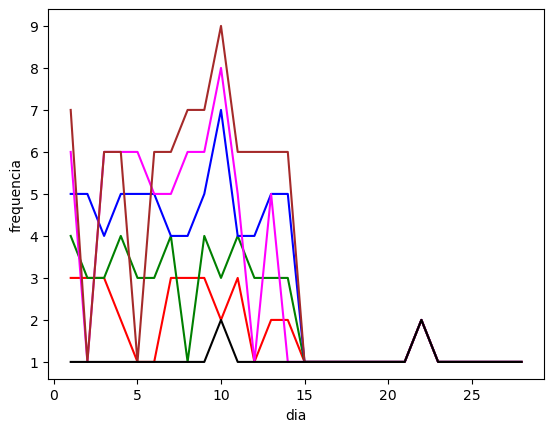

In [16]:
ax = sns.lineplot(x="dia", y="frequencia", data=df_BedToToilet_test2035, color='red')
ax = sns.lineplot(x="dia", y="frequencia", data=df_BedToToilet_test4055, color='green')
ax = sns.lineplot(x="dia", y="frequencia", data=df_BedToToilet_test6075, color='blue')
ax = sns.lineplot(x="dia", y="frequencia", data=df_BedToToilet_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="frequencia", data=df_BedToToilet_test2095, color='brown')
ax = sns.lineplot(x="dia", y="frequencia", data=df_BedToToilet_valid, color='black')

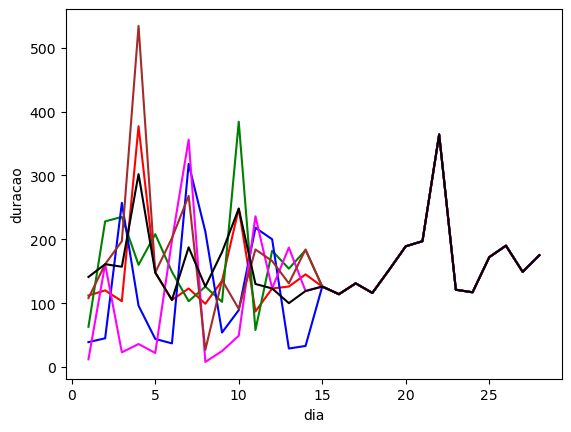

In [17]:
ax = sns.lineplot(x="dia", y="duracao", data=df_BedToToilet_test2035, color='red')
ax = sns.lineplot(x="dia", y="duracao", data=df_BedToToilet_test4055, color='green')
ax = sns.lineplot(x="dia", y="duracao", data=df_BedToToilet_test6075, color='blue')
ax = sns.lineplot(x="dia", y="duracao", data=df_BedToToilet_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="duracao", data=df_BedToToilet_test2095, color='brown')
ax = sns.lineplot(x="dia", y="duracao", data=df_BedToToilet_valid, color='black')

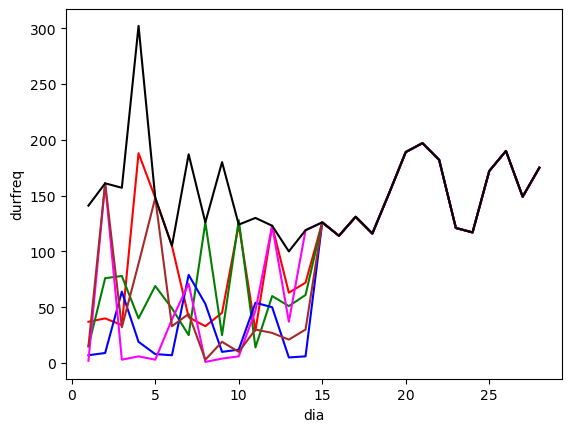

In [18]:
ax = sns.lineplot(x="dia", y="durfreq", data=df_BedToToilet_test2035, color='red')
ax = sns.lineplot(x="dia", y="durfreq", data=df_BedToToilet_test4055, color='green')
ax = sns.lineplot(x="dia", y="durfreq", data=df_BedToToilet_test6075, color='blue')
ax = sns.lineplot(x="dia", y="durfreq", data=df_BedToToilet_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="durfreq", data=df_BedToToilet_test2095, color='brown')
ax = sns.lineplot(x="dia", y="durfreq", data=df_BedToToilet_valid, color='black')

In [19]:
# Eating

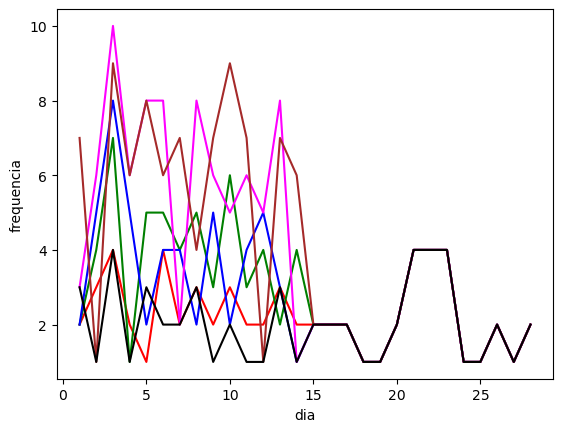

In [20]:
ax = sns.lineplot(x="dia", y="frequencia", data=df_Eating_test2035, color='red')
ax = sns.lineplot(x="dia", y="frequencia", data=df_Eating_test4055, color='green')
ax = sns.lineplot(x="dia", y="frequencia", data=df_Eating_test6075, color='blue')
ax = sns.lineplot(x="dia", y="frequencia", data=df_Eating_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="frequencia", data=df_Eating_test2095, color='brown')
ax = sns.lineplot(x="dia", y="frequencia", data=df_Eating_valid, color='black')

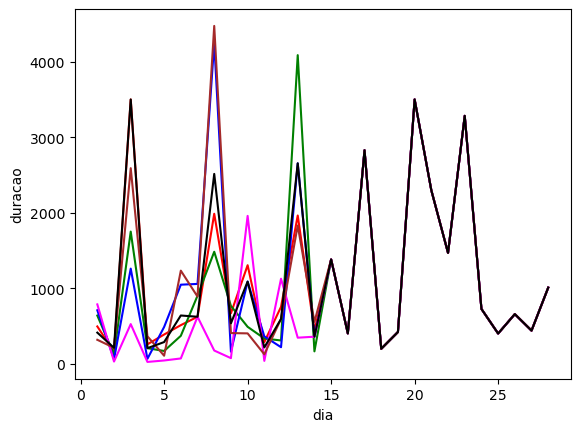

In [21]:
ax = sns.lineplot(x="dia", y="duracao", data=df_Eating_test2035, color='red')
ax = sns.lineplot(x="dia", y="duracao", data=df_Eating_test4055, color='green')
ax = sns.lineplot(x="dia", y="duracao", data=df_Eating_test6075, color='blue')
ax = sns.lineplot(x="dia", y="duracao", data=df_Eating_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="duracao", data=df_Eating_test2095, color='brown')
ax = sns.lineplot(x="dia", y="duracao", data=df_Eating_valid, color='black')

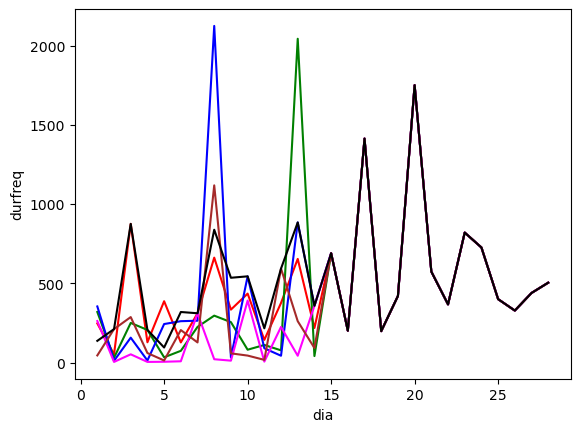

In [22]:
ax = sns.lineplot(x="dia", y="durfreq", data=df_Eating_test2035, color='red')
ax = sns.lineplot(x="dia", y="durfreq", data=df_Eating_test4055, color='green')
ax = sns.lineplot(x="dia", y="durfreq", data=df_Eating_test6075, color='blue')
ax = sns.lineplot(x="dia", y="durfreq", data=df_Eating_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="durfreq", data=df_Eating_test2095, color='brown')
ax = sns.lineplot(x="dia", y="durfreq", data=df_Eating_valid, color='black')

In [23]:
# MealPreparation

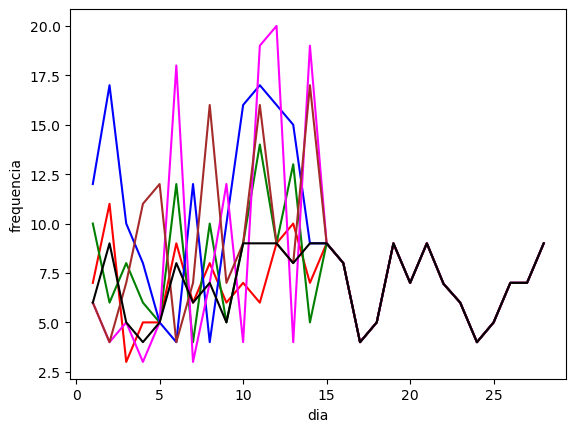

In [24]:
ax = sns.lineplot(x="dia", y="frequencia", data=df_MealPreparation_test2035, color='red')
ax = sns.lineplot(x="dia", y="frequencia", data=df_MealPreparation_test4055, color='green')
ax = sns.lineplot(x="dia", y="frequencia", data=df_MealPreparation_test6075, color='blue')
ax = sns.lineplot(x="dia", y="frequencia", data=df_MealPreparation_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="frequencia", data=df_MealPreparation_test2095, color='brown')
ax = sns.lineplot(x="dia", y="frequencia", data=df_MealPreparation_valid, color='black')

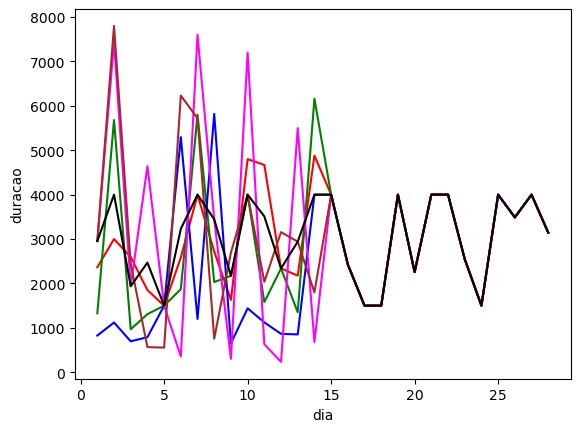

In [25]:
ax = sns.lineplot(x="dia", y="duracao", data=df_MealPreparation_test2035, color='red')
ax = sns.lineplot(x="dia", y="duracao", data=df_MealPreparation_test4055, color='green')
ax = sns.lineplot(x="dia", y="duracao", data=df_MealPreparation_test6075, color='blue')
ax = sns.lineplot(x="dia", y="duracao", data=df_MealPreparation_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="duracao", data=df_MealPreparation_test2095, color='brown')
ax = sns.lineplot(x="dia", y="duracao", data=df_MealPreparation_valid, color='black')

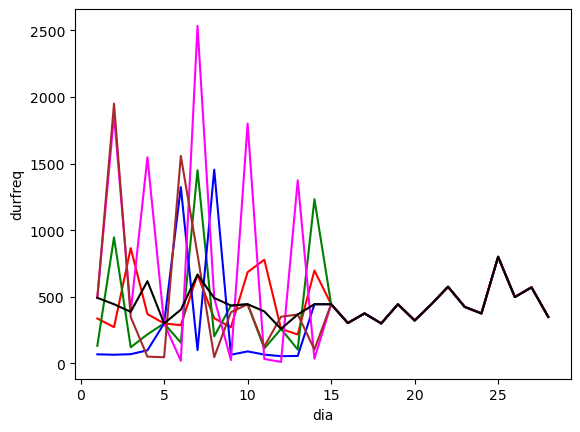

In [26]:
ax = sns.lineplot(x="dia", y="durfreq", data=df_MealPreparation_test2035, color='red')
ax = sns.lineplot(x="dia", y="durfreq", data=df_MealPreparation_test4055, color='green')
ax = sns.lineplot(x="dia", y="durfreq", data=df_MealPreparation_test6075, color='blue')
ax = sns.lineplot(x="dia", y="durfreq", data=df_MealPreparation_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="durfreq", data=df_MealPreparation_test2095, color='brown')
ax = sns.lineplot(x="dia", y="durfreq", data=df_MealPreparation_valid, color='black')

In [27]:
# Relax

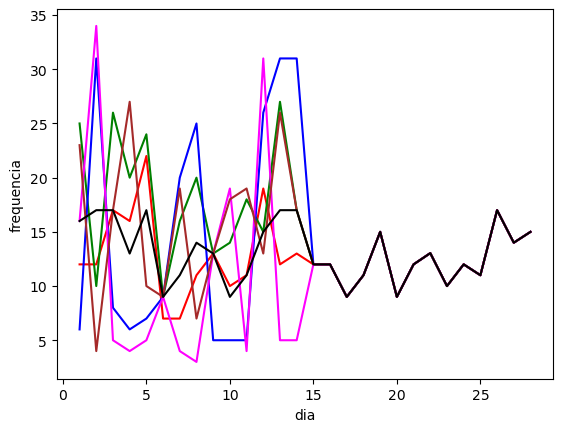

In [28]:
ax = sns.lineplot(x="dia", y="frequencia", data=df_Relax_test2035, color='red')
ax = sns.lineplot(x="dia", y="frequencia", data=df_Relax_test4055, color='green')
ax = sns.lineplot(x="dia", y="frequencia", data=df_Relax_test6075, color='blue')
ax = sns.lineplot(x="dia", y="frequencia", data=df_Relax_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="frequencia", data=df_Relax_test2095, color='brown')
ax = sns.lineplot(x="dia", y="frequencia", data=df_Relax_valid, color='black')

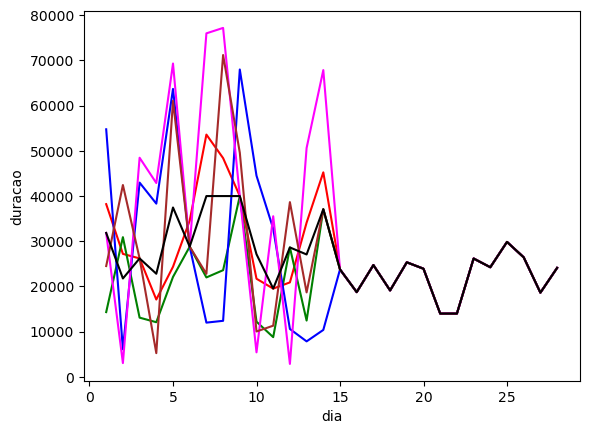

In [29]:
ax = sns.lineplot(x="dia", y="duracao", data=df_Relax_test2035, color='red')
ax = sns.lineplot(x="dia", y="duracao", data=df_Relax_test4055, color='green')
ax = sns.lineplot(x="dia", y="duracao", data=df_Relax_test6075, color='blue')
ax = sns.lineplot(x="dia", y="duracao", data=df_Relax_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="duracao", data=df_Relax_test2095, color='brown')
ax = sns.lineplot(x="dia", y="duracao", data=df_Relax_valid, color='black')

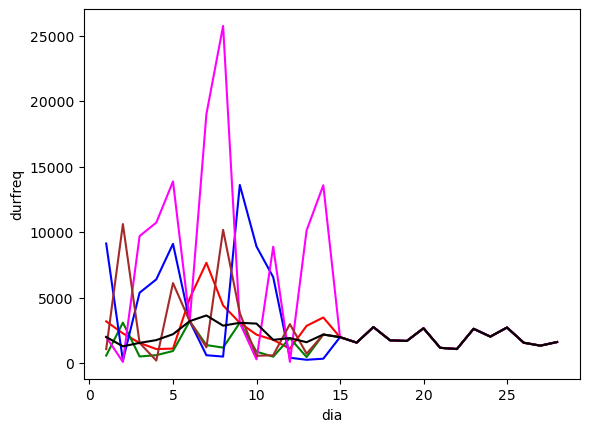

In [30]:
ax = sns.lineplot(x="dia", y="durfreq", data=df_Relax_test2035, color='red')
ax = sns.lineplot(x="dia", y="durfreq", data=df_Relax_test4055, color='green')
ax = sns.lineplot(x="dia", y="durfreq", data=df_Relax_test6075, color='blue')
ax = sns.lineplot(x="dia", y="durfreq", data=df_Relax_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="durfreq", data=df_Relax_test2095, color='brown')
ax = sns.lineplot(x="dia", y="durfreq", data=df_Relax_valid, color='black')

In [31]:
# Sleeping

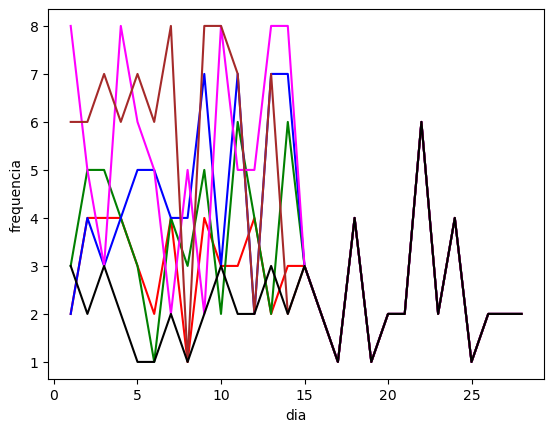

In [32]:
ax = sns.lineplot(x="dia", y="frequencia", data=df_Sleeping_test2035, color='red')
ax = sns.lineplot(x="dia", y="frequencia", data=df_Sleeping_test4055, color='green')
ax = sns.lineplot(x="dia", y="frequencia", data=df_Sleeping_test6075, color='blue')
ax = sns.lineplot(x="dia", y="frequencia", data=df_Sleeping_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="frequencia", data=df_Sleeping_test2095, color='brown')
ax = sns.lineplot(x="dia", y="frequencia", data=df_Sleeping_valid, color='black')

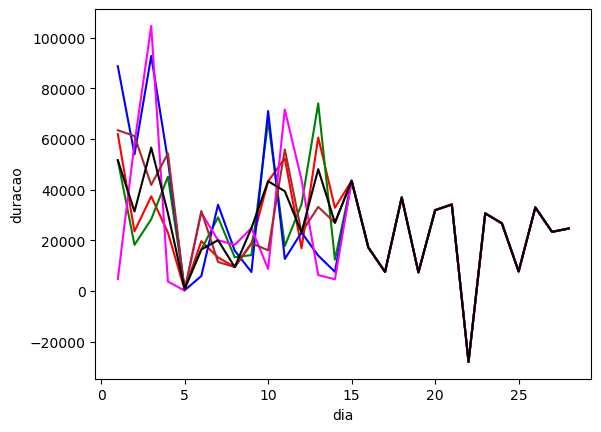

In [33]:
ax = sns.lineplot(x="dia", y="duracao", data=df_Sleeping_test2035, color='red')
ax = sns.lineplot(x="dia", y="duracao", data=df_Sleeping_test4055, color='green')
ax = sns.lineplot(x="dia", y="duracao", data=df_Sleeping_test6075, color='blue')
ax = sns.lineplot(x="dia", y="duracao", data=df_Sleeping_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="duracao", data=df_Sleeping_test2095, color='brown')
ax = sns.lineplot(x="dia", y="duracao", data=df_Sleeping_valid, color='black')

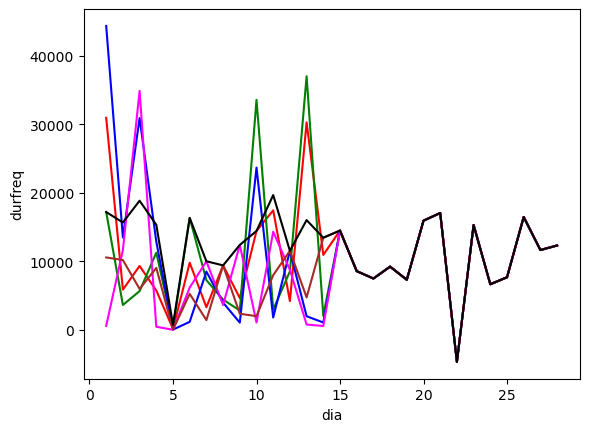

In [34]:
ax = sns.lineplot(x="dia", y="durfreq", data=df_Sleeping_test2035, color='red')
ax = sns.lineplot(x="dia", y="durfreq", data=df_Sleeping_test4055, color='green')
ax = sns.lineplot(x="dia", y="durfreq", data=df_Sleeping_test6075, color='blue')
ax = sns.lineplot(x="dia", y="durfreq", data=df_Sleeping_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="durfreq", data=df_Sleeping_test2095, color='brown')
ax = sns.lineplot(x="dia", y="durfreq", data=df_Sleeping_valid, color='black')

In [35]:
print('DONE')

DONE
